### Student Information
Name: 陳牧心

Student ID: 113078512

GitHub ID: Mercy1303

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhsinchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/muhsinchen/miniconda3/envs/DM2025LAB1/bin/python
3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 08:47:03) [Clang 18.1.8 ]


## Data Preparation

In [4]:
import pandas as pd
from collections import namedtuple

csv_path = "Reddit-stock-sentiment.csv"
df = pd.read_csv(csv_path)

text_candidates  = ['text', 'headline', 'title', 'News']
label_candidates = ['Sentiment', 'sentiment', 'label', 'Label', 'y', 'target']

TEXT_COL  = next((c for c in text_candidates  if c in df.columns), None)
LABEL_COL = next((c for c in label_candidates if c in df.columns), None)
if TEXT_COL is None or LABEL_COL is None:
    raise KeyError(f"Cannot find text/label columns. Columns={df.columns.tolist()}")

#data cleaning
df = df.dropna(subset=[TEXT_COL, LABEL_COL]).copy()

if df[LABEL_COL].dtype == 'O':
    norm_map = {
        'negative':'negative','neg':'negative','bearish':'negative','-1':'negative',
        'neutral':'neutral','neu':'neutral','0':'neutral',
        'positive':'positive','pos':'positive','bullish':'positive','1':'positive'
    }
    df['category_name'] = df[LABEL_COL].astype(str).str.lower().str.strip().map(norm_map)
else:
    num_map = {-1:'negative', 0:'neutral', 1:'positive', 2:'positive'}
    df['category_name'] = df[LABEL_COL].map(num_map)

categories = ['negative', 'neutral', 'positive']
df = df[df['category_name'].isin(categories)].copy()

cat2id = {c:i for i,c in enumerate(categories)}
df['category'] = df['category_name'].map(cat2id)

#data/target/target_names
Bunch = namedtuple('Bunch', ['data', 'target', 'target_names'])
twenty_train = Bunch(
    data         = df[TEXT_COL].astype(str).tolist(),
    target       = df['category'].to_numpy(),
    target_names = categories
)



In [5]:
twenty_train.data[0:5]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.',
 'Seeing lots of red in the ticker.',
 "Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.\n\n**Highlight Main Points**\n\n* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.\n* The feat highlights the power of electric boating and pushes the limits of innovation.\n* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.\n\n**TLDR**\n\nHold onto your seats – Vision Marine Technologies Inc. and Shaun Torrente have shat

In [6]:
twenty_train.target_names

['negative', 'neutral', 'positive']

In [7]:
len(twenty_train.data)

847

In [8]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

Calls on retards


In [29]:
print(twenty_train.target_names[twenty_train.target[0]])

negative


In [9]:
twenty_train.target[0]

np.int64(0)

In [10]:
# category of first 10 documents.
twenty_train.target[0:10]

array([0, 2, 1, 2, 1, 2, 0, 2, 2, 1])

In [11]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

negative
positive
neutral
positive
neutral
positive
negative
positive
positive
neutral


### Exerciese 1

In [12]:
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(twenty_train.data[i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


## 3. Data Transformation

In [14]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [15]:
len(X)

847

In [16]:
X[0:2]

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...


In [17]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### Adding Columns

In [18]:
# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X[0:10]

,text,category,category_name
0,Calls on retards,0,negative
1,Stunt as in like why did they even make a big ...,2,positive
2,Seeing lots of red in the ticker.,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,positive
4,He didn’t say thank you.,1,neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",2,positive
6,Trump will respond to china increasing their t...,0,negative
7,Confirmed not a trap. Its been like this for p...,2,positive
8,Am I the only one seeing the cup & handle brea...,2,positive
9,HLGN is $10. Hurry and catch it now before it ...,1,neutral


### 3.2 Familiarizing yourself with the Data

In [19]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,positive
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,neutral
5,"Hoping to ejaculate in wet warm puss tonight, ...",positive
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,positive
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,neutral


In [20]:
# using loc (by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [21]:
# using iloc (by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### Exerciese 2

In [22]:
#Boolean filter
X.loc[X["text"].str.contains("Subject:", case=False, na=False), "text"].head(10)

#Regex extract + filter
senders = X["text"].str.extract(r"From:\s*([^\n]+)", expand=False)
X.loc[senders.str.contains(r"@.*pitt\.edu", na=False), "text"].head(10)

#Text-length filter
X.loc[X["text"].str.len().between(200, 400, inclusive="both"), "text"].head(10)

6     Trump will respond to china increasing their t...
13     I’ve been doing pretty good with this, but it...
35    Goshdang about time. It was fine to say when I...
39    Other countries probably will go through a rec...
44    Completely unrelated, but for like 20 years of...
52    >I did some digging and found they had a gover...
66    The funny part is that Elmo has called Navarro...
69    **You're absolutely right:** Since February 4,...
73    Look,  the USA somehow thought a second term f...
77    There are funds which directly hold physical g...
Name: text, dtype: object

### Exerciese 3

In [23]:
X[X["category_name"]=="positive"][::10][0:5]

,text,category,category_name
1,Stunt as in like why did they even make a big ...,2,positive
25,"You see, Target, pissing off a good chunk of y...",2,positive
56,"To be fair, Chinese exports to the US make up ...",2,positive
73,"Look, the USA somehow thought a second term f...",2,positive
96,200k loss in a month.. haha,2,positive


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [24]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [25]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### Exerciese 4

In [26]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [27]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series

text        dummy_record
category               1
dtype: object

In [28]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,category
0,dummy_record,1


In [29]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

# check if the records was commited into result
len(result_with_series)

848

In [30]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [31]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

848

In [32]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [33]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [34]:
len(X)

847

### Exerciese 5

In [35]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [36]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### 4.2 Dealing with Duplicate Data

In [37]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [38]:
sum(X.duplicated())

23

In [39]:
sum(X.duplicated('text'))

23

In [40]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [41]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
len(X)

849

In [42]:
sum(X.duplicated())

24

In [43]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(X)

813

## 5.  Data Preprocessing

### 5.1 Sampling

In [47]:
X_sample = X.sample(n=800) #random state
len(X_sample)

800

In [48]:
X_sample[0:4]

,text,category,category_name
814,He could just sleep through the presidency lik...,2,positive
713,Just dm me,1,neutral
388,"If I have cash sitting in SPAXX for example, w...",1,neutral
389,"Cause depression, remove consumer protection!",1,neutral


### Exerciese 6
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
"""Compare to X, X_sample contains only 800 randomly selected rows. 
The row order is shuffled, and the original index values are kept. 
The columns/structure stay the same, but the category distribution may change slightly due to random sampling.
"""

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

categories

['negative', 'neutral', 'positive']

category_name
positive    315
neutral     303
negative    195
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

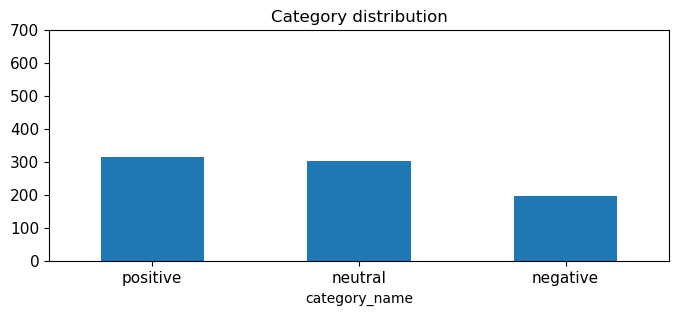

In [52]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
positive    309
neutral     297
negative    194
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

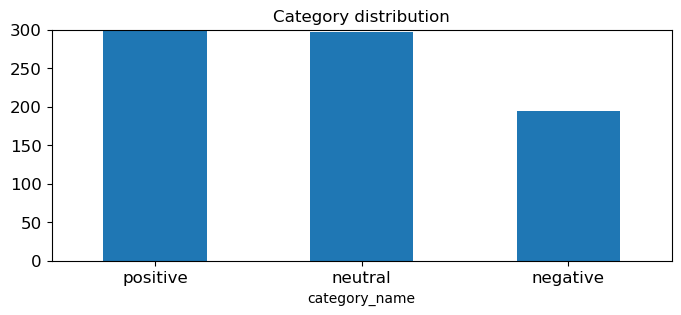

In [53]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### Exercise 7
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

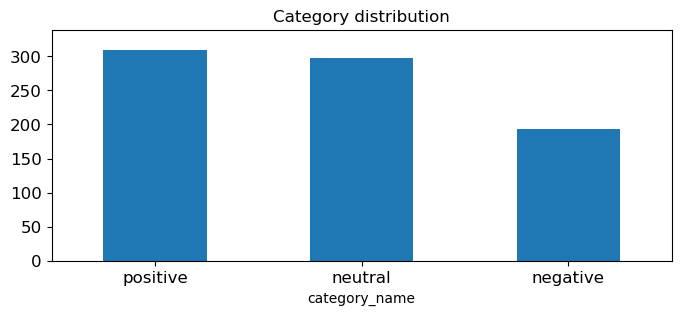

In [54]:
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (8,3))

### Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

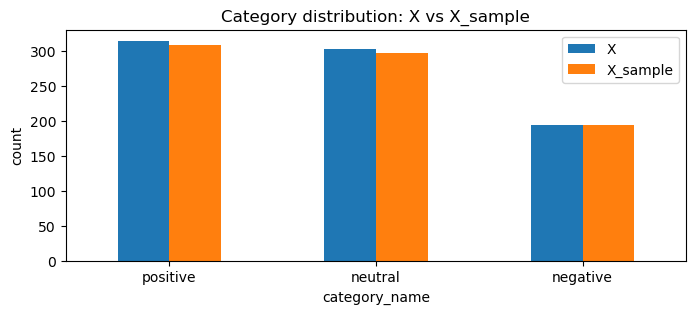

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# counts
cnt_X = X['category_name'].value_counts()
cnt_S = X_sample['category_name'].value_counts()

# align categories+put into one table
dist = pd.DataFrame({'X': cnt_X, 'X_sample': cnt_S}).fillna(0).astype(int)

# side-by-side bar chart
ax = dist.plot(kind='bar', figsize=(8,3), rot=0, title='Category distribution: X vs X_sample')
ax.set_xlabel('category_name')
ax.set_ylabel('count')
plt.show()

### 5.2 Feature Creation

In [56]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhsinchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/muhsinchen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [58]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [59]:
X[0:4]

,text,category,category_name,unigrams
0,Calls on retards,0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,2,positive,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,1,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,2,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [60]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4313)>
  Coords	Values
  (0, 689)	1
  (0, 2682)	1
  (0, 3220)	1


In [65]:
count_vect.get_feature_names_out()[689]

'calls'

In [66]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### Exercise 9

In [67]:
analyze(X.text[0])

['calls', 'on', 'retards']

Now let us look at the term-document matrix we built above.

In [68]:
X_counts.shape

(813, 4313)

In [69]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [72]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [73]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### Exercise 10

In [74]:
feature_names = count_vect.get_feature_names_out()
nonzero_indices = X_counts[4].nonzero()[1]
words_in_doc5 = feature_names[nonzero_indices]
words_in_doc5

array(['he', 'didn', 'say', 'thank', 'you'], dtype=object)

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [76]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

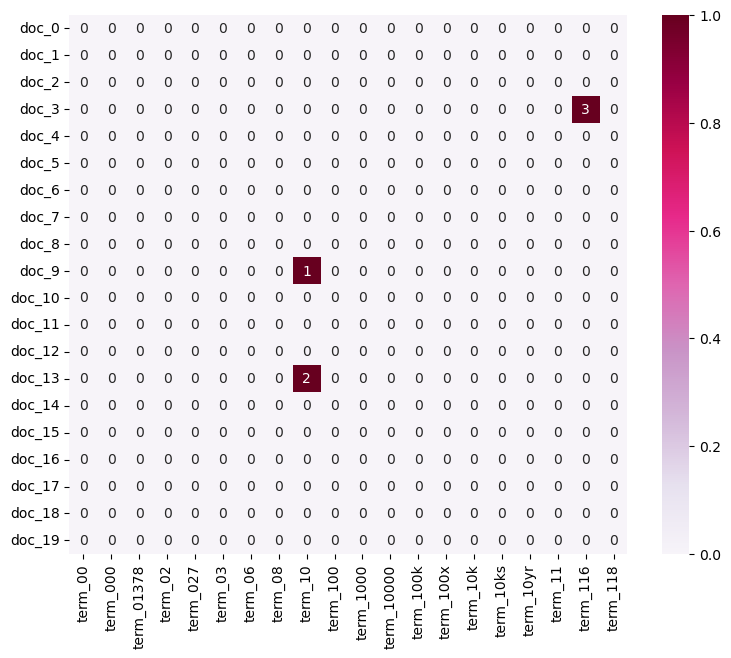

In [77]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 11

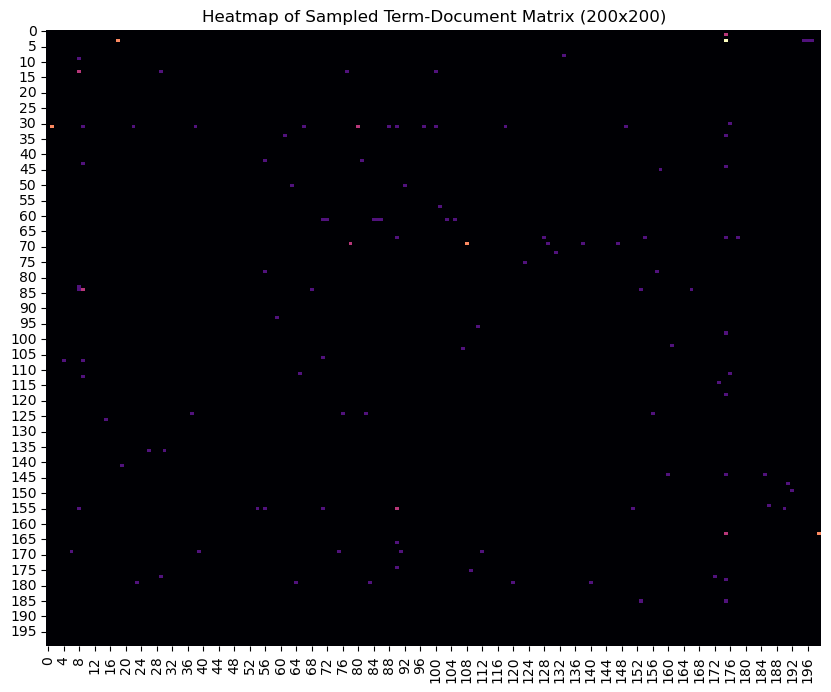

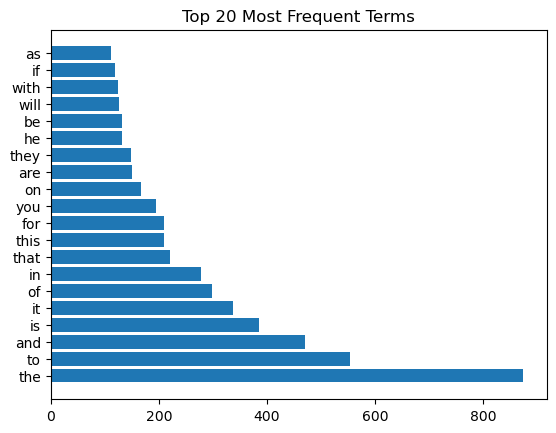

In [78]:
# Sampling a subset of documents and terms
sample_docs = 200
sample_terms = 200
plot_z = X_counts[:sample_docs, :sample_terms].toarray()

# Heatmap visualization (Seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
df_todraw = pd.DataFrame(plot_z)
plt.figure(figsize=(10, 8))
sns.heatmap(df_todraw, cmap="magma", cbar=False)
plt.title("Heatmap of Sampled Term-Document Matrix (200x200)")
plt.show()

# Bar plots for top frequent terms
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
top_indices = term_frequencies.argsort()[-20:][::-1]
top_terms = np.array(count_vect.get_feature_names_out())[top_indices]
plt.barh(top_terms, term_frequencies[top_indices])
plt.title("Top 20 Most Frequent Terms")
plt.show()

###  5.4.1 Transform Text Data

In [79]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [80]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_46215/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


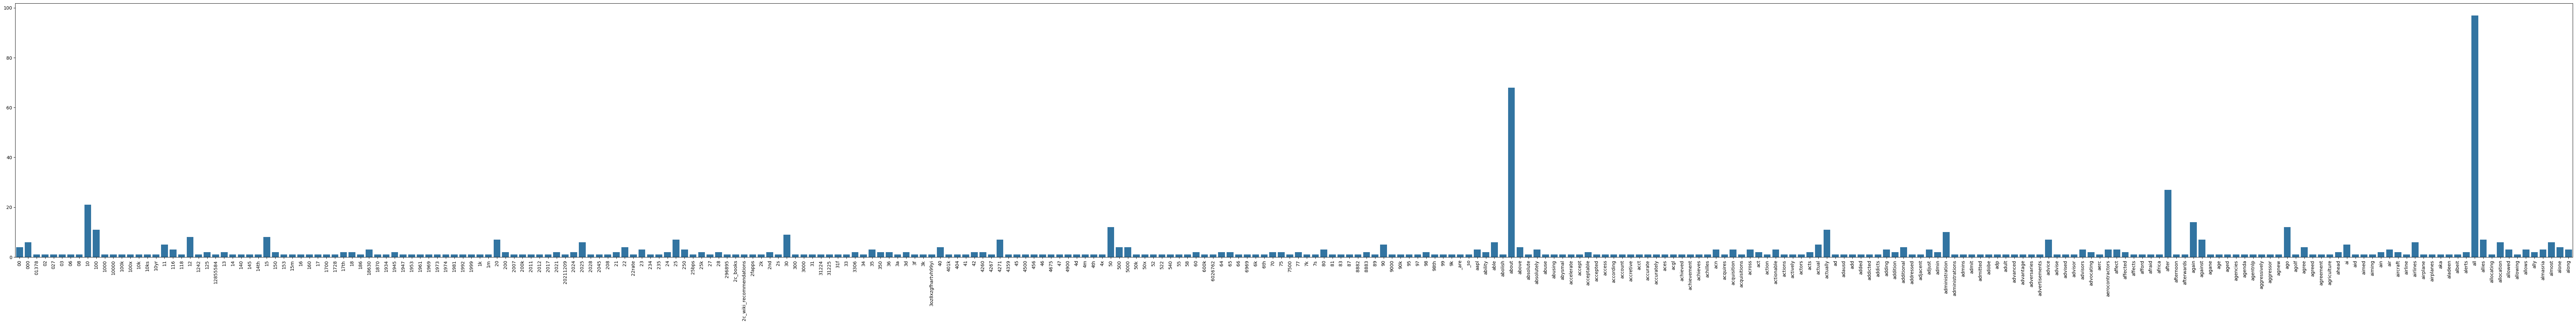

In [83]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Exercise 12
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [84]:
import plotly.express as px
import pandas as pd
import numpy as np

# create dataframe of first 300 terms
term_df = pd.DataFrame({
    'term': count_vect.get_feature_names_out()[:300],
    'frequency': term_frequencies[:300]
})

# interactive bar chart
fig = px.bar(term_df, x='term', y='frequency',
             title="Top 300 Terms (Interactive Visualization)",
             labels={'term': 'Term', 'frequency': 'Frequency'},
             color='frequency',
             color_continuous_scale='Blues')
fig.update_xaxes(tickangle=90)
fig.show()


### Exercise 13
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_46215/1110918831.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




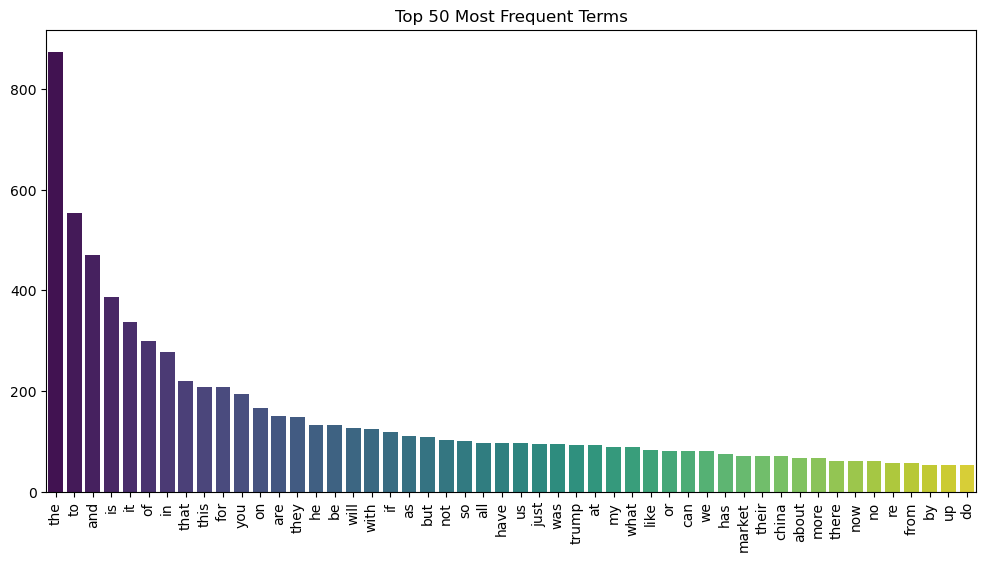

In [85]:
N = 50
top_indices = term_frequencies.argsort()[-N:][::-1]
top_terms = np.array(count_vect.get_feature_names_out())[top_indices]
top_values = term_frequencies[top_indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_terms, y=top_values, palette="viridis")
plt.xticks(rotation=90)
plt.title(f"Top {N} Most Frequent Terms")
plt.show()

### Exercise 14
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

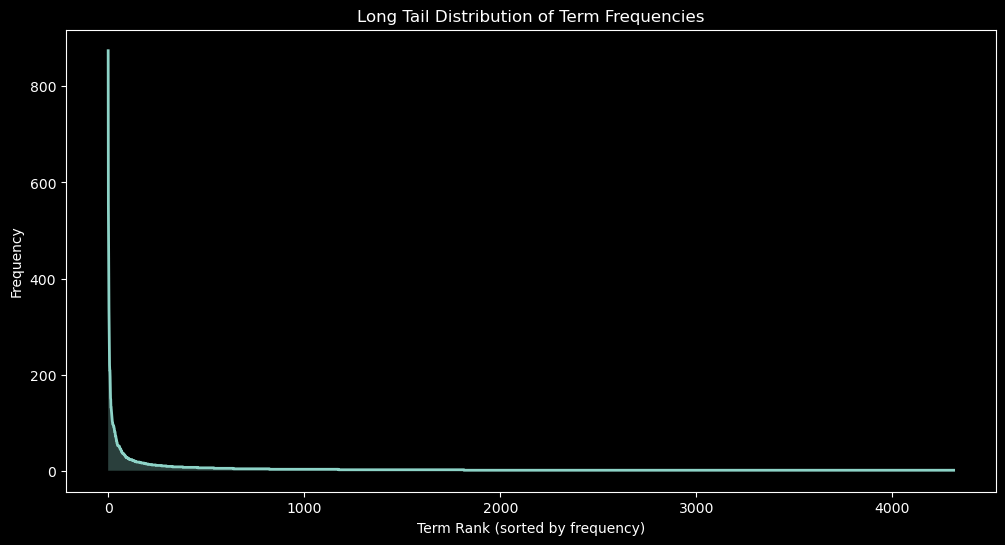

In [106]:
import matplotlib.pyplot as plt
import numpy as np

term_frequencies = np.asarray(term_frequencies).ravel()
sorted_freq = np.sort(term_frequencies)[::-1]

plt.style.use("dark_background")
plt.figure(figsize=(12,6))
plt.plot(sorted_freq, linewidth=2)
plt.fill_between(range(len(sorted_freq)), sorted_freq, alpha=0.3)
plt.title("Long Tail Distribution of Term Frequencies")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.show()


---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [86]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_46215/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



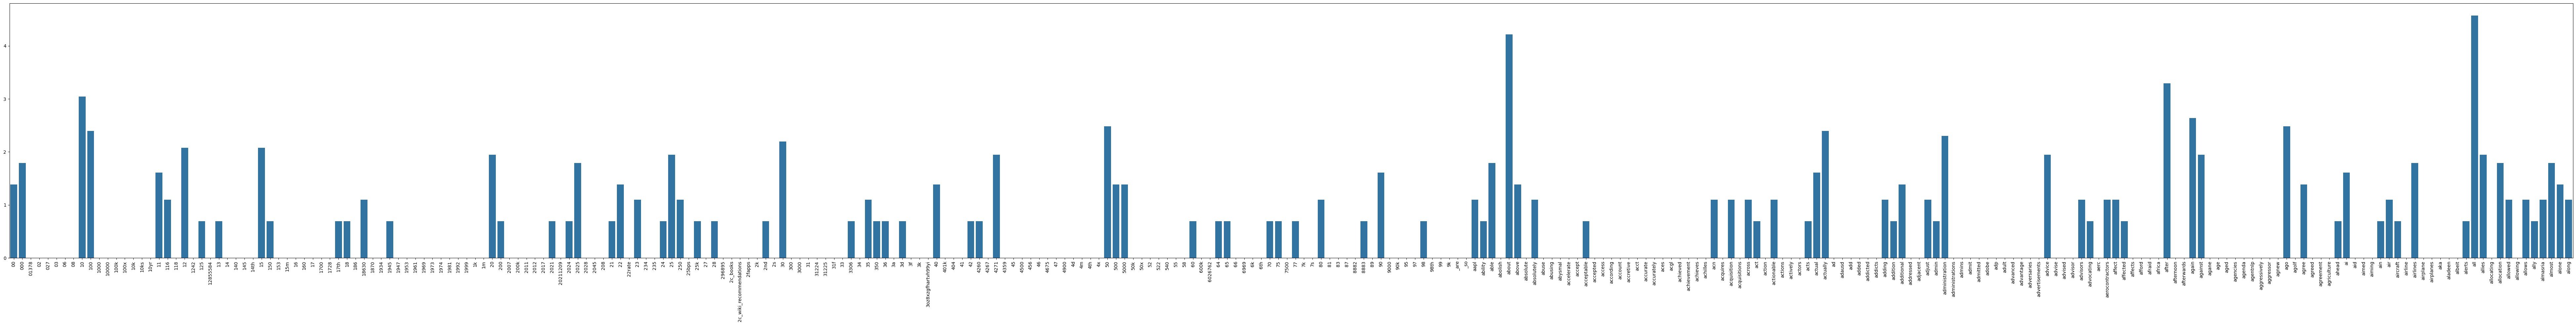

In [87]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Exercise 15
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

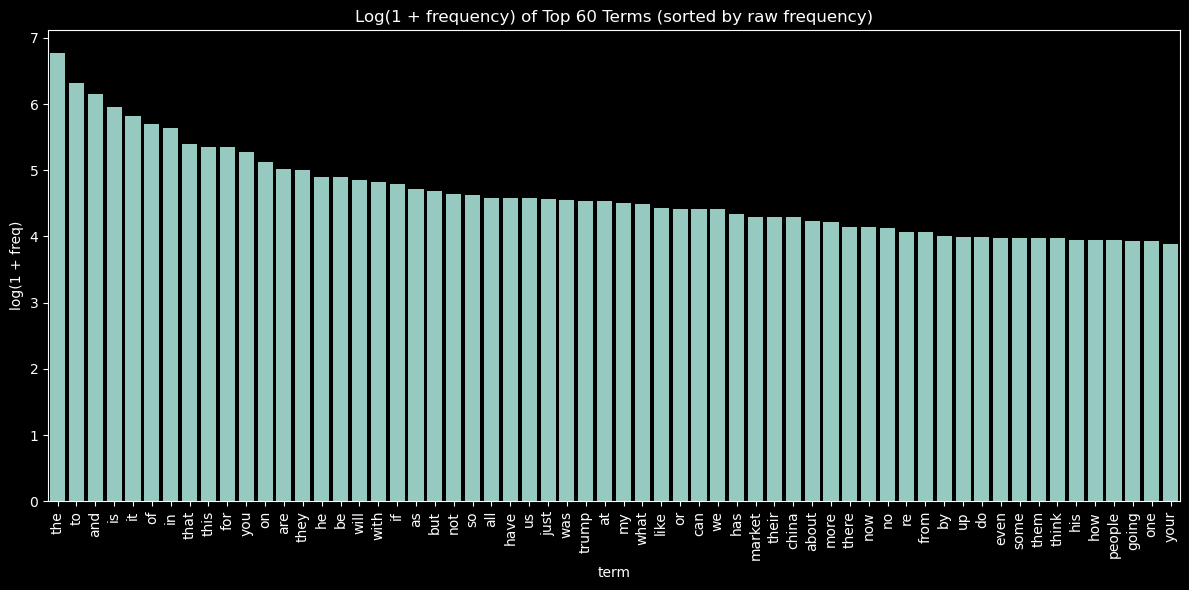

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
term_frequencies_log = np.log1p(term_frequencies)
order = term_frequencies.argsort()[::-1]

N = 60
terms = count_vect.get_feature_names_out()[order][:N]
vals_log = term_frequencies_log[order][:N]

plt.figure(figsize=(12, 6))
sns.barplot(x=terms, y=vals_log)
plt.title(f'Log(1 + frequency) of Top {N} Terms (sorted by raw frequency)')
plt.xticks(rotation=90)
plt.ylabel('log(1 + freq)')
plt.xlabel('term')
plt.tight_layout()
plt.show()

In [ ]:
# Comment about the differences
"""

"""

# Phase 2

###  5.4.2 Finding frequent patterns

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("Reddit-stock-sentiment.csv")

label_map = {-1.0: "negative", 0.0: "neutral", 1.0: "positive"}
df = df.dropna(subset=["title", "label"]).copy()
df["category_name"] = df["label"].map(label_map)

X = pd.DataFrame({
    "text": df["title"].astype(str),
    "category_name": df["category_name"].astype(str)
}).reset_index(drop=True)

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [48]:
# Display the filtered DataFrame for one of the categories
category_number=0 #can change it from 0 to 2
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category negative:


,000,08,10,11,125,14,145,16,18,1952,...,why,will,with,wsb,xi,xrtx,yamana,year,yields,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


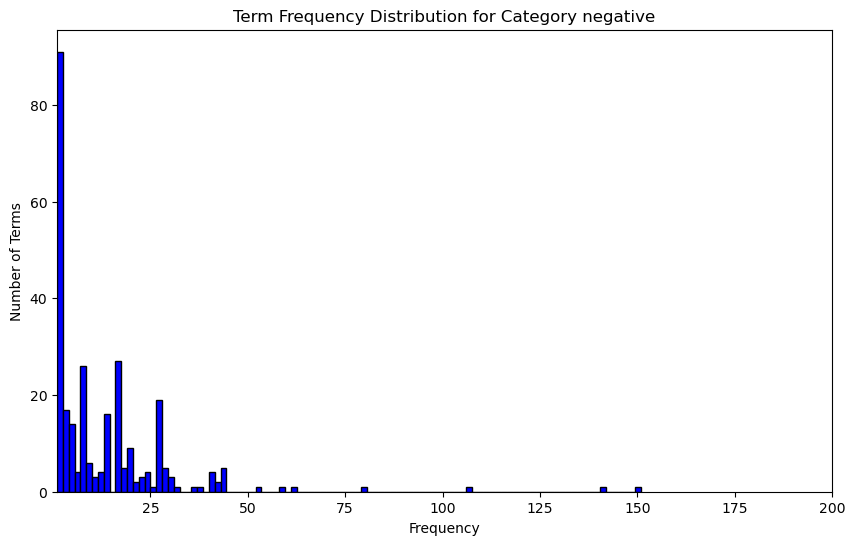

In [49]:
# Sum over all documents to get total frequency for each word
category_number=0 # Can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=100, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()


In [50]:
category_number=0 #Can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in top 5%: 14
Filtered terms: ['the', 'trump', 'to', 'is', 'on', 'china', 'in', '2025', 'for', 'of', 'president', 'us', '11', 'weekend']


In [51]:
filt_term_document_dfs[categories[category_number]].loc[:, filtered_words[0]].sum(axis=0)


np.int64(151)

In [52]:
category_number=0 #Can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in bottom 1%: 2
Filtered terms: ['000', 'results']


In [53]:
filt_term_document_dfs[categories[category_number]].loc[:, filtered_words[0]].sum(axis=0)

np.int64(1)

In [58]:
category_number=0 # Can change it from 0 to 2

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
000        1
results    1
dtype: int64
Top 5.0% words: 
weekend       42
11            42
us            43
president     43
of            44
for           44
2025          44
in            52
china         58
on            62
is            79
to           106
trump        141
the          151
dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
list     1
hulu     1
ideas    1
inc      1
dtype: int64
Top 5.0% words: 
data           31
10             31
president      31
goods          32
125            32
with           35
now            35
us             35
tariff         40
of             41
weekend        43
11             44
discussion     44
stocks         46
in             54
china          57
thread         58
on             59
2025           61
is             61
for            64
to             88
trump          95
the           149
dtype: int64

For category positive we f

,08,10,125,14,145,16,18,1952,2008,2014,...,why,will,with,wsb,xi,xrtx,yamana,year,yields,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PAMI

In [ ]:
from PAMI.extras.convert.DF2DB import DF2DB

csv_paths = {} 

for category in categories:
    cat_safe = str(category).replace('.', '_').replace(' ', '_')
    db_csv = f'td_freq_db_{cat_safe}.csv'
    csv_paths[category] = db_csv

    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(db_csv, '>=', 1)

csv_paths


{'negative': 'td_freq_db_negative.csv',
 'neutral': 'td_freq_db_neutral.csv',
 'positive': 'td_freq_db_positive.csv'}


DB Stats for: negative
Database size (total no of transactions) : 315
Number of items : 264
Minimum Transaction Size : 2
Average Transaction Size : 8.59047619047619
Maximum Transaction Size : 33
Standard Deviation Transaction Size : 5.10031789503218
Variance in Transaction Sizes : 26.09608735213831
Sparsity : 0.9674603174603175


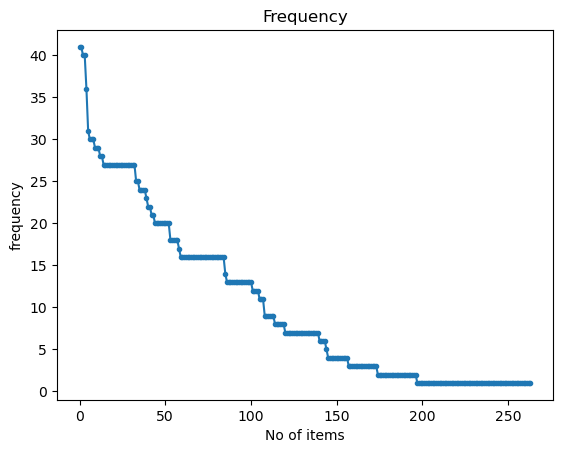

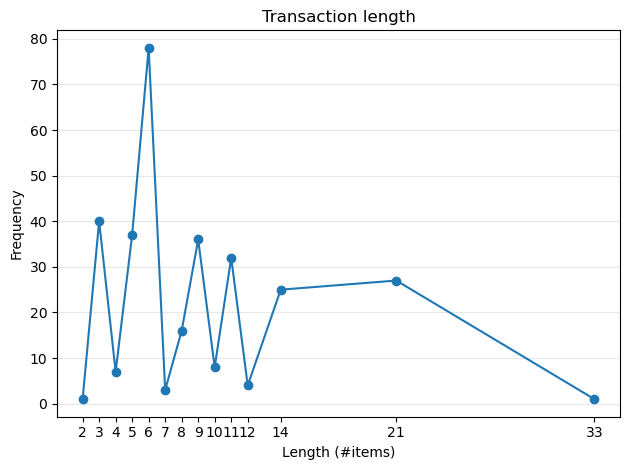


DB Stats for: neutral
Database size (total no of transactions) : 423
Number of items : 453
Minimum Transaction Size : 1
Average Transaction Size : 6.208037825059102
Maximum Transaction Size : 20
Standard Deviation Transaction Size : 4.338429265332677
Variance in Transaction Sizes : 18.866570311362082
Sparsity : 0.9862957222404877


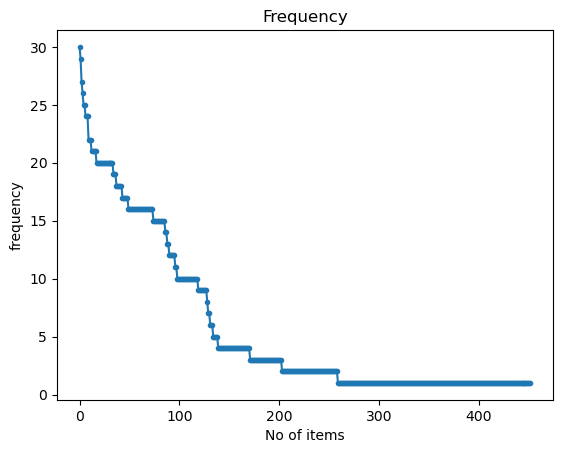

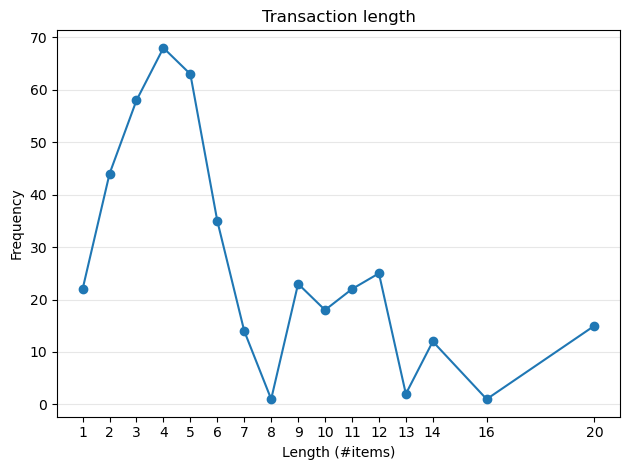


DB Stats for: positive
Database size (total no of transactions) : 109
Number of items : 291
Minimum Transaction Size : 1
Average Transaction Size : 6.5963302752293576
Maximum Transaction Size : 22
Standard Deviation Transaction Size : 4.68085945620208
Variance in Transaction Sizes : 22.113319741760108
Sparsity : 0.9773321983669094


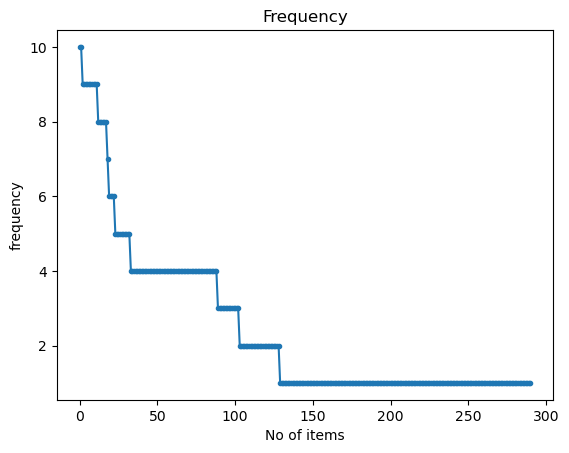

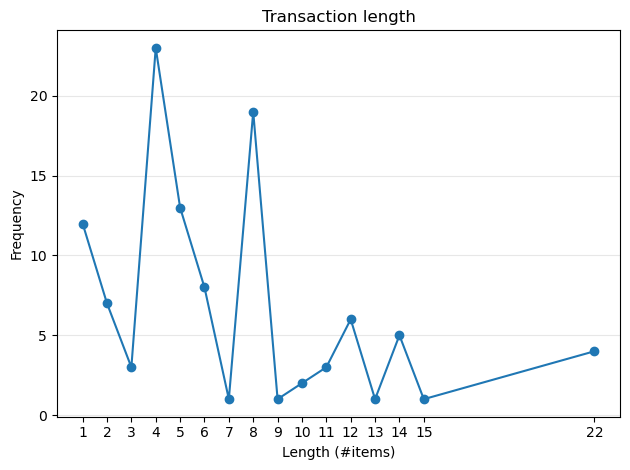

In [63]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in categories:
    cat_safe = str(category).replace('.', '_').replace(' ', '_')
    db_csv = csv_paths[category]
    print(f'\nDB Stats for: {category}')
    obj = tds.TransactionalDatabase(db_csv)
    obj.run()
    obj.printStats()
    obj.plotGraphs()

In [69]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
for category in categories:
    cat_safe = str(category).replace('.', '_').replace(' ', '_')
    db_csv = csv_paths[category]

    fp = alg.FPGrowth(iFile=db_csv, minSup=minSup)
    fp.mine()
    df = fp.getPatternsAsDataFrame()

    print(f'\n[{category}] Total patterns: {len(df)}')
    print('Runtime:', fp.getRuntime())

    fp.save(f'freq_patterns_{cat_safe}_minSup{minSup}.txt')
    df


Frequent patterns were generated successfully using frequentPatternGrowth algorithm

[negative] Total patterns: 2119223
Runtime: 0.7536280155181885
Frequent patterns were generated successfully using frequentPatternGrowth algorithm

[neutral] Total patterns: 1073041
Runtime: 0.2748699188232422
Frequent patterns were generated successfully using frequentPatternGrowth algorithm

[positive] Total patterns: 259
Runtime: 0.0007119178771972656


In [ ]:
import pandas as pd

dfs = [freq_dfs[c] for c in categories]

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pat in df['Patterns']:
        pattern_counts[pat] = pattern_counts.get(pat, 0) + 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {p for p, cnt in pattern_counts.items() if cnt == 1}

total_patterns_count     = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_dfs.append(df[df['Patterns'].isin(unique_patterns)])

# Merge the filtered dataframes into a final dataframe and sort by support
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True).sort_values(by='Support', ascending=False)

#only remain top_n 1000
TOP_N = 1000
final_pattern_df = final_pattern_df.head(TOP_N).copy()
print(f"Using top {len(final_pattern_df)} patterns by support")

print(final_pattern_df)
print(f'Number of patterns discarded: {discarded_patterns_count}')


Using top 1000 patterns by support
                                                  Patterns  Support
2099799                                         discussion       41
2099777                                         goods\t125       30
2099772                                              goods       30
2099769                                                125       30
2099768                                           and\tone       29
...                                                    ...      ...
1400162  his\tpolicy\tone\tafter\tabout\tdecision\tdo\t...       27
1400161  his\tpolicy\tone\tafter\tabout\tdecision\tdo\t...       27
1400160  his\tpolicy\tone\tafter\tabout\tdecision\tdo\t...       27
1400188  his\tpolicy\tone\tafter\tabout\tdecision\tmaki...       27
1400190  his\tpolicy\tone\tafter\tabout\tdecision\tmaki...       27

[1000 rows x 2 columns]
Number of patterns discarded: 39102


In [81]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms  = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

for pat in final_pattern_df['Patterns']:
    pat_words = set(pat.split())
    pattern_matrix[pat] = X['tokenized_text'].apply(lambda s: 1 if pat_words.issubset(s) else 0)

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df


,000,04,08,10,100k,10k,11,12,125,14,...,his\tpolicy\tone\tafter\tabout\tdecision\tfeel\thow\tsitting\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tfeel\thow\tpumping\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tfeel\thow\town\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tfeel\thow\tmedia\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tfeel\thow\tmaking\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tdo\tpumping\tsitting\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tdo\town\tsitting\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tdo\town\tpumping\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tmaking\tmedia\town\tsocial,his\tpolicy\tone\tafter\tabout\tdecision\tmaking\tmedia\tsitting\tsocial
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Top-K(FAE) and MaxFPGrowth
target_category = categories[0]
cat_safe = str(target_category).replace('.', '_').replace(' ', '_')
target_db_csv = csv_paths[target_category]

#FAE Top-K
from PAMI.frequentPattern.topk import FAE as alg

for k in [500, 1000, 1500]:
    fae = alg.FAE(iFile=target_db_csv, k=k)
    fae.mine()
    df_topk = fae.getPatternsAsDataFrame()
    print(f'\n[FAE Top-K] {target_category} | k={k} -> patterns:', len(df_topk))
    print('Runtime:', fae.getRuntime())
    display(df_topk.head(10))
    # fae.save(f'fae_topk_{cat_safe}_k{k}.txt')

# Maximal FP-Growth
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

for ms in [3, 6, 9]:
    mfp = alg.MaxFPGrowth(iFile=target_db_csv, minSup=ms)
    mfp.mine()
    df_max = mfp.getPatternsAsDataFrame()
    print(f'\n[MaxFPGrowth] {target_category} | minSup={ms} -> patterns:', len(df_max))
    print('Runtime:', mfp.getRuntime())
    display(df_max.head(10))
    # mfp.save(f'maxfp_{cat_safe}_minsup{ms}.txt')


 TopK frequent patterns were successfully generated using FAE algorithm.

[FAE Top-K] negative | k=500 -> patterns: 500
Runtime: 47.33259391784668


,Patterns,Support
0,discussion,41
1,with,41
2,policy,40
3,his,40
4,tariffs,36
5,stock,31
6,125,30
7,goods,30
8,one,30
9,125 goods,30


 TopK frequent patterns were successfully generated using FAE algorithm.

[FAE Top-K] negative | k=1000 -> patterns: 1000
Runtime: 92.64029288291931


,Patterns,Support
0,discussion,41
1,with,41
2,policy,40
3,his,40
4,tariffs,36
5,stock,31
6,125,30
7,goods,30
8,one,30
9,125 goods,30


 TopK frequent patterns were successfully generated using FAE algorithm.

[FAE Top-K] negative | k=1500 -> patterns: 1500
Runtime: 138.19503116607666


,Patterns,Support
0,discussion,41
1,with,41
2,policy,40
3,his,40
4,tariffs,36
5,stock,31
6,125,30
7,goods,30
8,one,30
9,125 goods,30


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

[MaxFPGrowth] negative | minSup=3 -> patterns: 27
Runtime: 0.004689931869506836


,Patterns,Support
0,recession,3
1,stock market any ideas performance under unexp...,3
2,kavl,3
3,thread 14 18 earnings weekly,3
4,thread stocks march my portfolio quarterly rate,3
5,good,3
6,treasuries dollar are 2008 assets esque former...,4
7,be,4
8,hotline please post someone,6
9,back 1952 consumer going level lowest plummets...,7


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

[MaxFPGrowth] negative | minSup=6 -> patterns: 19
Runtime: 0.00548100471496582


,Patterns,Support
0,hotline please post someone,6
1,back 1952 consumer going level lowest plummets...,7
2,10 now has consecutive declined giant history ...,7
3,back off market this bond continuing crash mak...,8
4,back boys menu retardation so wsb,9
5,market now complete denial right,11
6,with 125 goods tariff all 145 an imported resp...,12
7,his just all into advisors bunch by economic h...,13
8,policy tariff are doing our really we well,13
9,it awful campaign everywhere fucking look misi...,16


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

[MaxFPGrowth] negative | minSup=9 -> patterns: 16
Runtime: 0.004759788513183594


,Patterns,Support
0,this,9
1,back boys menu retardation so wsb,9
2,market now complete denial right,11
3,with 125 goods tariff all 145 an imported resp...,12
4,his just all into advisors bunch by economic h...,13
5,policy tariff are doing our really we well,13
6,it awful campaign everywhere fucking look misi...,16
7,just asked authority chair court federal fire ...,16
8,tariffs off 10 as continues led rise sell trea...,16
9,tariffs 125 goods breaking raises,18


### 5.5 Dimensionality Reduction

In [73]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
plt.style.use('default')

X_pca_tdm  = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)


In [77]:
print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)

(847, 2)
(847, 2)
(847, 2)


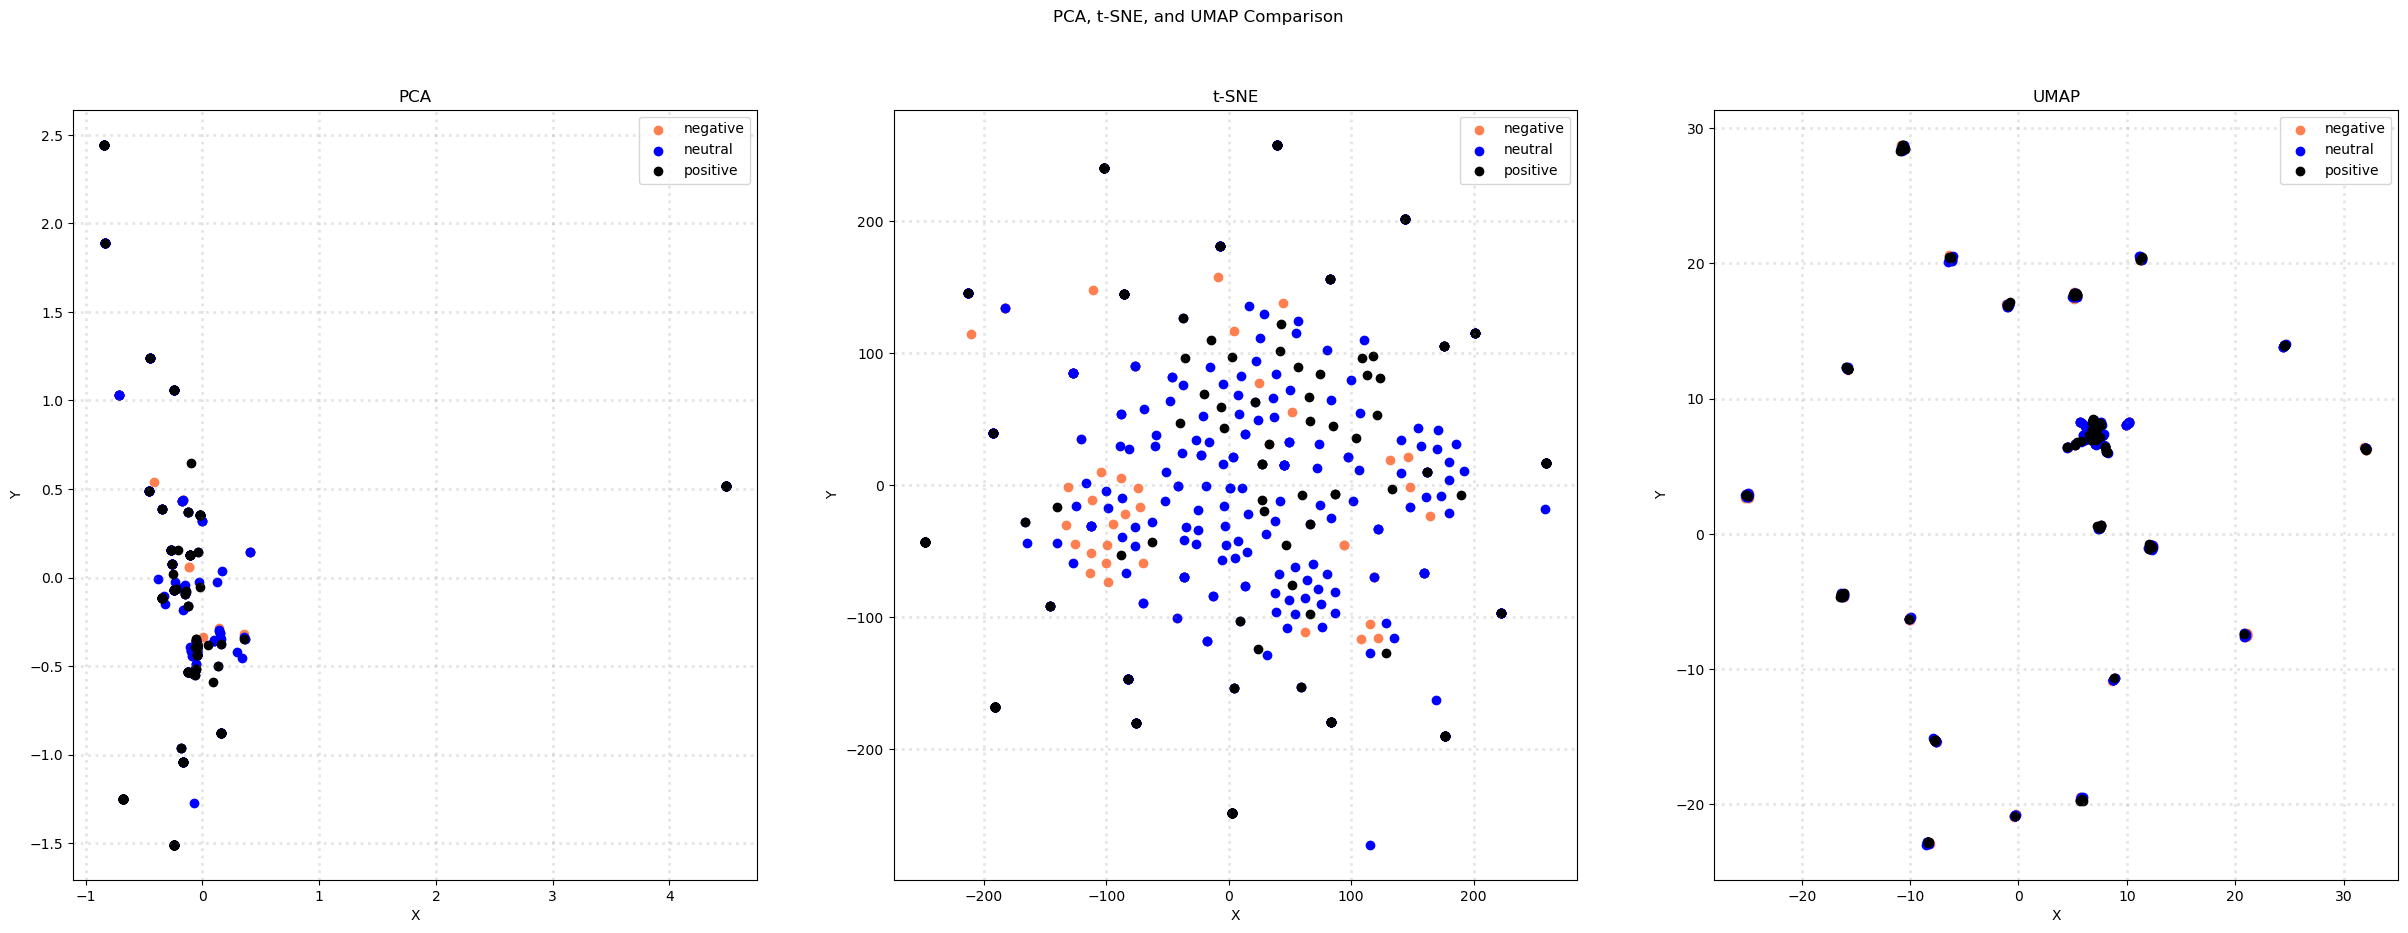

In [78]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')
plt.show()

In [82]:
X_pca_aug  = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

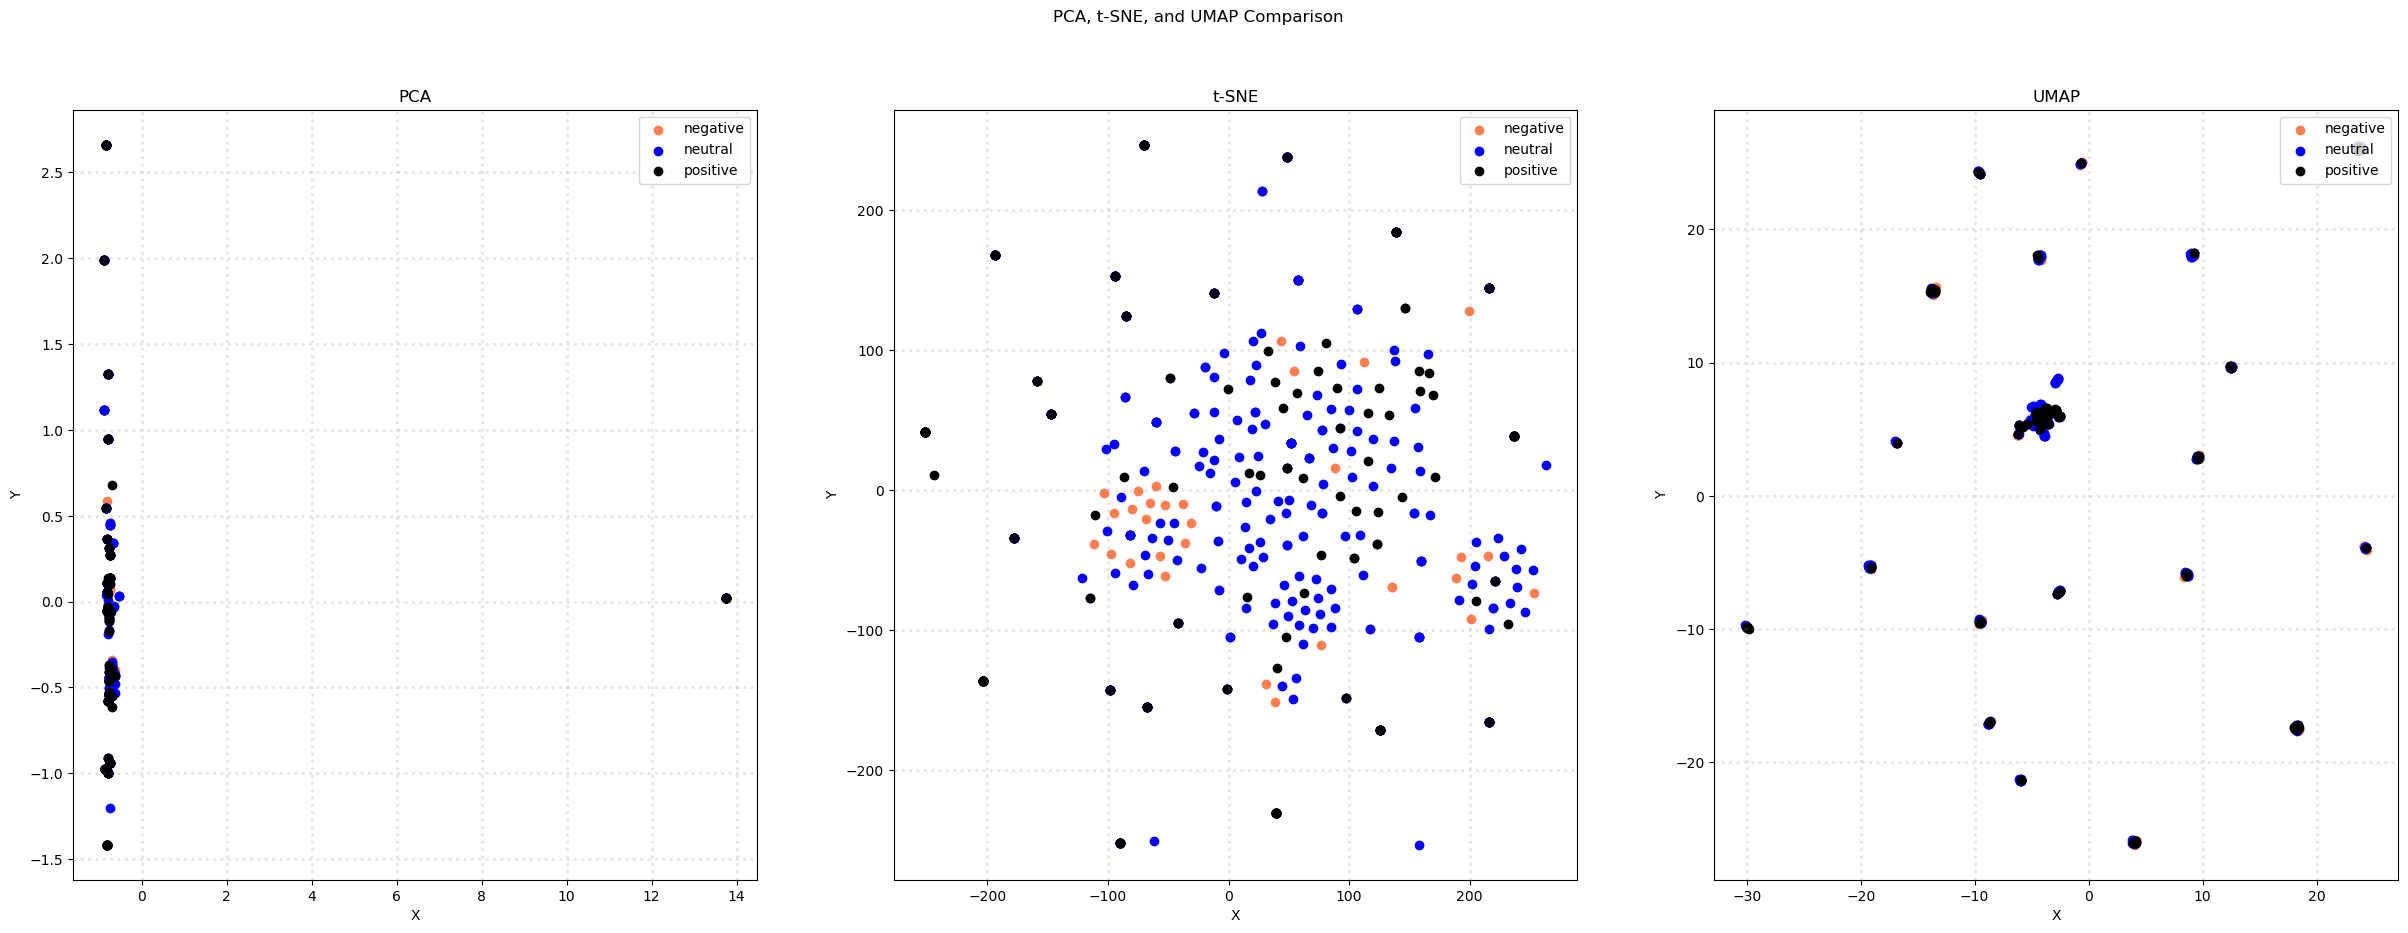

In [83]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
plt.show()

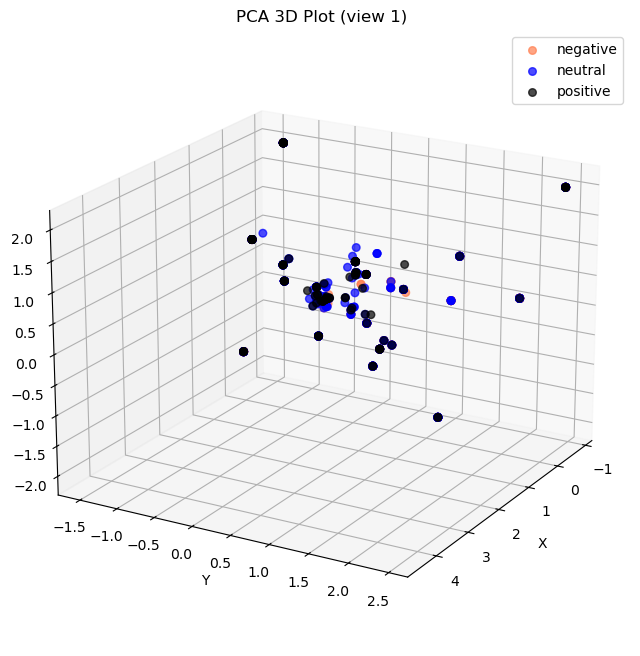

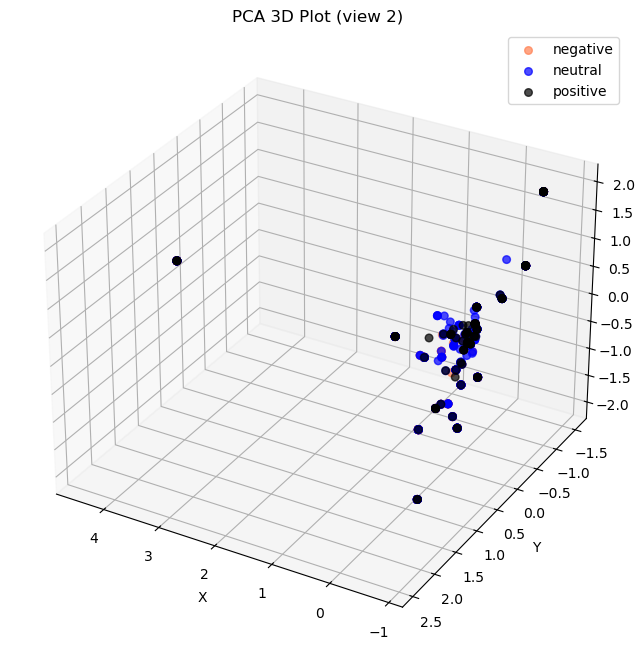

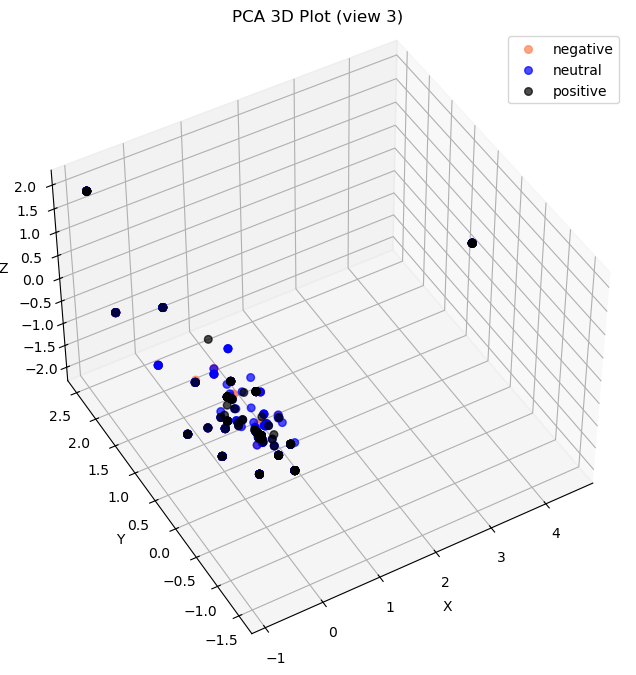

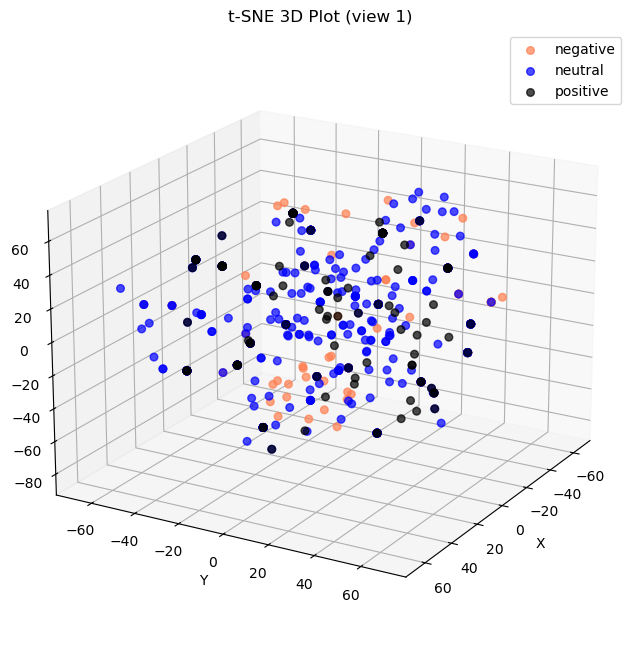

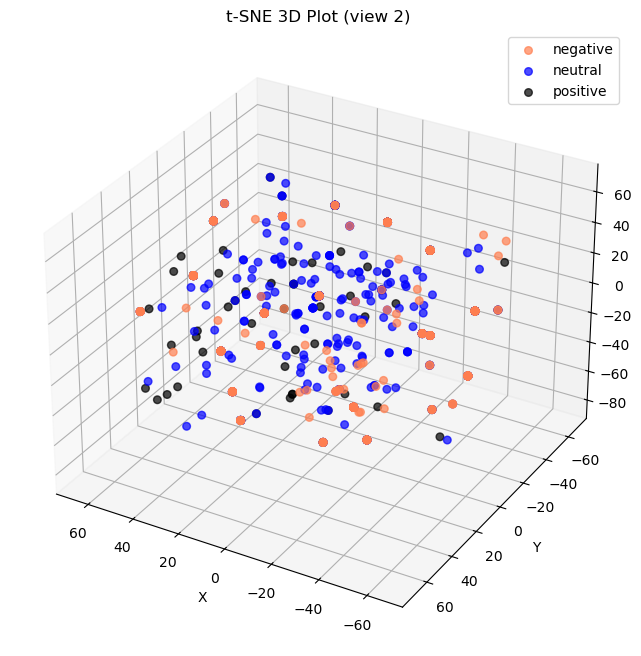

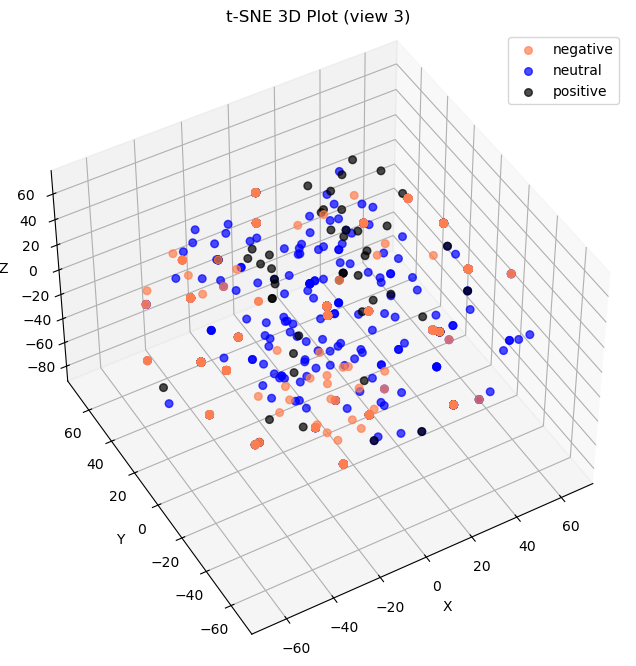

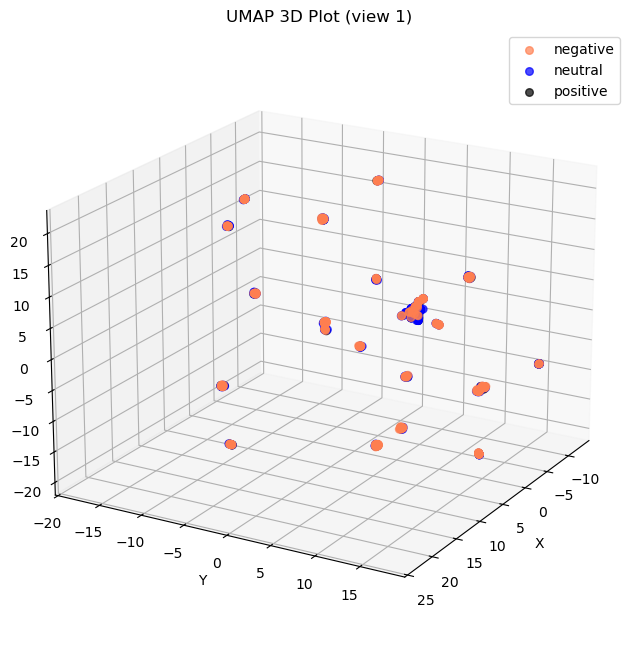

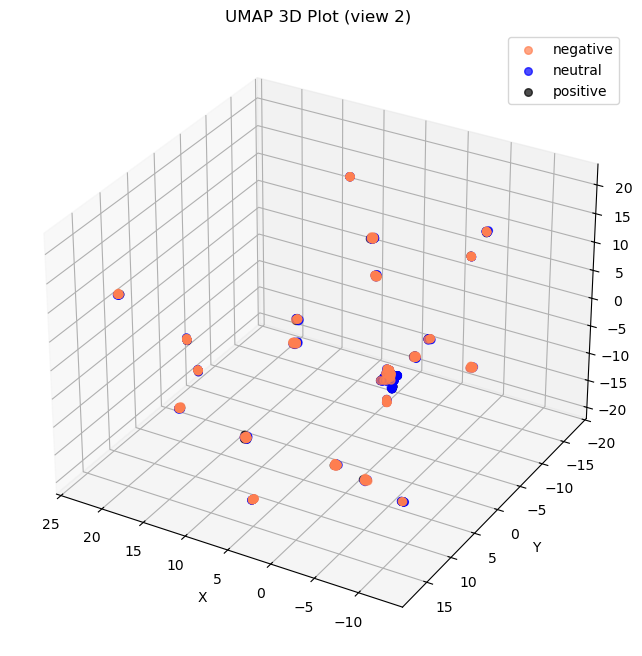

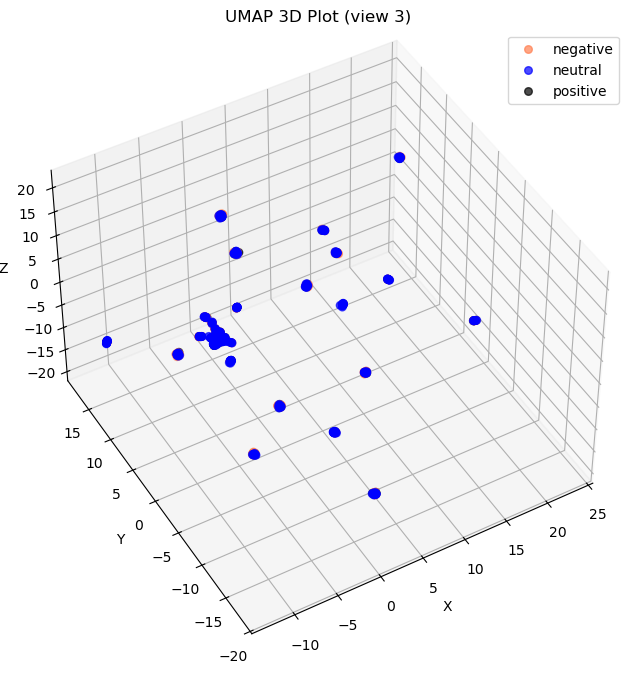

In [84]:
from mpl_toolkits.mplot3d import Axes3D

X_pca_3d  = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

def plot_3d_scatter(X_reduced, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category, 0]
        ys = X_reduced[X['category_name'] == category, 1]
        zs = X_reduced[X['category_name'] == category, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, s=30, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.legend()
    return ax

methods = {
    'PCA 3D Plot':  X_pca_3d,
    't-SNE 3D Plot':X_tsne_3d,
    'UMAP 3D Plot': X_umap_3d
}
angles = [(20, 30), (30, 120), (45, 240)]

for name, data_3d in methods.items():
    for i, (elev, azim) in enumerate(angles):
        ax = plot_3d_scatter(data_3d, f'{name} (view {i+1})')
        ax.view_init(elev=elev, azim=azim)
        plt.show()


### 5.6 Discretization and Binarization

In [85]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [95]:
mlb.fit(X['category_name'])

,neg_label,0
,pos_label,1
,sparse_output,False


In [88]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [89]:
X[0:9]

,text,category_name,tokenized_text,bin_category_name
0,Retardation is on the menu boys! WSB is so back,negative,"{menu, WSB, so, on, back, boys!, is, Retardati...","[1, 0, 0]"
1,Retail giant TARGET has now declined for 10 co...,neutral,"{longest, Retail, giant, weeks,, history, its,...","[0, 1, 0]"
2,How do you feel about a sitting president maki...,neutral,"{you, social, with, day, decision?, a, one, fe...","[0, 1, 0]"
3,Who knows more? $VMAR,positive,"{Who, knows, more?, $VMAR}","[0, 0, 1]"
4,The Trump administration is begging Xi Jinping...,negative,"{Jinping, quickly., Xi, The, administration, T...","[1, 0, 0]"
5,Weekend Discussion Thread for the Weekend of A...,neutral,"{of, 2025, 11,, Weekend, for, April, the, Disc...","[0, 1, 0]"
6,Is the market in complete denial right now?,negative,"{Is, complete, denial, in, right, now?, the, m...","[1, 0, 0]"
7,Retardation is on the menu boys! WSB is so back,neutral,"{menu, WSB, so, on, back, boys!, is, Retardati...","[0, 1, 0]"
8,"It's fucking awful seeing the ""Silver"" misinfo...",positive,"{misinformation, seeing, awful, It's, ""Silver""...","[0, 0, 1]"


In [ ]:
from sklearn import preprocessing

mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X['category_name'])
X['bin_category_name'] = mlb2.transform(X['category_name']).tolist()
X[0:9]

,text,category_name,tokenized_text,bin_category_name
0,Retardation is on the menu boys! WSB is so back,negative,"{menu, WSB, so, on, back, boys!, is, Retardati...","[1, 0, 0]"
1,Retail giant TARGET has now declined for 10 co...,neutral,"{longest, Retail, giant, weeks,, history, its,...","[0, 1, 0]"
2,How do you feel about a sitting president maki...,neutral,"{you, social, with, day, decision?, a, one, fe...","[0, 1, 0]"
3,Who knows more? $VMAR,positive,"{Who, knows, more?, $VMAR}","[0, 0, 1]"
4,The Trump administration is begging Xi Jinping...,negative,"{Jinping, quickly., Xi, The, administration, T...","[1, 0, 0]"
5,Weekend Discussion Thread for the Weekend of A...,neutral,"{of, 2025, 11,, Weekend, for, April, the, Disc...","[0, 1, 0]"
6,Is the market in complete denial right now?,negative,"{Is, complete, denial, in, right, now?, the, m...","[1, 0, 0]"
7,Retardation is on the menu boys! WSB is so back,neutral,"{menu, WSB, so, on, back, boys!, is, Retardati...","[0, 1, 0]"
8,"It's fucking awful seeing the ""Silver"" misinfo...",positive,"{misinformation, seeing, awful, It's, ""Silver""...","[0, 0, 1]"


# 6. Data Exploration

In [108]:
idxs = np.random.choice(len(X), size=3, replace=False)
document_to_transform_1 = [X.iloc[idxs[0]]['text']]
document_to_transform_2 = [X.iloc[idxs[1]]['text']]
document_to_transform_3 = [X.iloc[idxs[2]]['text']]

In [109]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['U.S. 10-year Treasury yields rise as Trump tariffs-led sell-off continues']
['Trump: We Are Doing Really Well On Our Tariff Policy.']
['Trump: We Are Doing Really Well On Our Tariff Policy.']


In [110]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [111]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.091287
Cosine Similarity using count bw 1 and 3: 0.091287
Cosine Similarity using count bw 2 and 3: 1.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_56973/452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_56973/452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_56973/452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single elemen

In [112]:
from sklearn.metrics.pairwise import cosine_similarity

document_to_transform_1 = [X.iloc[10]['text']]
document_to_transform_2 = [X.iloc[50]['text']]
document_to_transform_3 = [X.iloc[100]['text']]

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_56973/1080638109.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_56973/1080638109.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/var/folders/w5/pvmrnyvn4mv959z40dcm7hrh0000gn/T/ipykernel_56973/1080638109.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single ele

# 7. Data Classification

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

le = LabelEncoder()
y = le.fit_transform(X['category_name'])
target_names = le.classes_

In [115]:
X_train

,000,04,08,10,100k,10k,11,12,125,14,...,xrtx,yamana,year,yield,yields,yolo,yoshitsu,you,your,ytd
218,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
X_test

,000,04,08,10,100k,10k,11,12,125,14,...,xrtx,yamana,year,yield,yields,yolo,yoshitsu,you,your,ytd
674,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
785,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, y, test_size=0.3, random_state=42, stratify=y
)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.4392156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.4578    0.4000    0.4270        95
     neutral     0.5149    0.5433    0.5287       127
    positive     0.1316    0.1515    0.1408        33

    accuracy                         0.4392       255
   macro avg     0.3681    0.3649    0.3655       255
weighted avg     0.4440    0.4392    0.4406       255



In [ ]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, y, test_size=0.3, random_state=42, stratify=y
)

nb_aug = MultinomialNB()
nb_aug.fit(X_train_aug, y_train_aug)

y_pred_aug = nb_aug.predict(X_test_aug)

print("Accuracy (augmented):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (augmented):\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy (augmented): 0.4470588235294118

Classification Report (augmented):
               precision    recall  f1-score   support

    negative     0.5152    0.1789    0.2656        95
     neutral     0.5000    0.7244    0.5916       127
    positive     0.1316    0.1515    0.1408        33

    accuracy                         0.4471       255
   macro avg     0.3822    0.3516    0.3327       255
weighted avg     0.4580    0.4471    0.4118       255



**What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?**

On this Reddit-sentiment data, the original TDM with MultinomialNB yields 0.4392 accuracy, macro-F1 0.3655, and weighted-F1 0.4406, whereas the augmented TDM nudges accuracy up to 0.4471 but drops macro-F1 to 0.3327 and weighted-F1 to 0.4118. Classwise, augmentation strongly boosts neutral (recall 0.5433 to 0.7244; F1 0.5287 to 0.5916) but severely hurts negative (recall 0.4000 to 0.1789; F1 0.4270 to 0.2656), while positive, the smallest class, shows little improvement. This suggests the binary pattern features primarily capture common/neutral phrases; when combined with class imbalance, MultinomialNB shifts probability mass toward the neutral class, overpredicting it and degrading balanced metrics even as overall accuracy inches up.

### Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, y, test_size=0.3, random_state=42, stratify=y
)

# Decision Tree on TDM
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (TDM):\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4980392156862745

Classification Report (TDM):
               precision    recall  f1-score   support

    negative     0.4655    0.5684    0.5118        95
     neutral     0.5294    0.5669    0.5475       127
    positive     0.3333    0.0303    0.0556        33

    accuracy                         0.4980       255
   macro avg     0.4428    0.3886    0.3716       255
weighted avg     0.4802    0.4980    0.4706       255



In [119]:
# Decision Tree on augmented features (tdm_df + pattern_matrix)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, y, test_size=0.3, random_state=42, stratify=y
)

dt_aug = DecisionTreeClassifier(random_state=42)
dt_aug.fit(X_train_aug, y_train_aug)

y_pred_aug = dt_aug.predict(X_test_aug)
print("Decision Tree Accuracy (AUG):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (AUG):\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Decision Tree Accuracy (AUG): 0.49411764705882355

Classification Report (AUG):
               precision    recall  f1-score   support

    negative     0.4655    0.5684    0.5118        95
     neutral     0.5259    0.5591    0.5420       127
    positive     0.2500    0.0303    0.0541        33

    accuracy                         0.4941       255
   macro avg     0.4138    0.3859    0.3693       255
weighted avg     0.4677    0.4941    0.4676       255

